In [1]:
import numpy as np
import do_mpc
from DifferentialDriveExperiment import DifferentialDriveExperiment
import yaml
import baseline_integration as bi
from datetime import datetime
from differential_drive_env_v1 import DifferentialDriveEnvV1
#HERE import the current baseline Env class 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/root/miniconda3/envs/dompc_dev/lib/python3.6/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
#HERE insert the ppo2 model associated to the actual wheel radius value:
#ppo2_meters_redesigned_1 is a model trained on the env in baseline_integration.py where L=0.5 and w=0.15
ppo2_model_name_w_012 = "ppo2_meters_redesigned_1"
ppo2_model_name_w_016 = "ppo2_meters_redesigned_1"
ppo2_model_name_w_017 = "ppo2_meters_redesigned_1"
#HERE insert  the right Env class for each trained model
env_class_name_w_012 = DifferentialDriveEnvV1
env_class_name_w_016 = DifferentialDriveEnvV1
env_class_name_w_017 = DifferentialDriveEnvV1
#HERE change the initial position accordingly
init_robot_pose = {'x': 0.12, 'y': -0.25, 'theta': -np.pi/2}

Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.



/root/miniconda3/envs/dompc_dev/lib/python3.6/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Here a trajectory of 501 obss e 500 actions from the model ppo2_meters_redesigned_1 corresponding to hp: L 0.5 and radius 0.12
Starting point: x:0.12, y:-0.25 -PURPLE-
End point: x:0.09527123425971122, y:-0.12626253868465895 -GREEN-


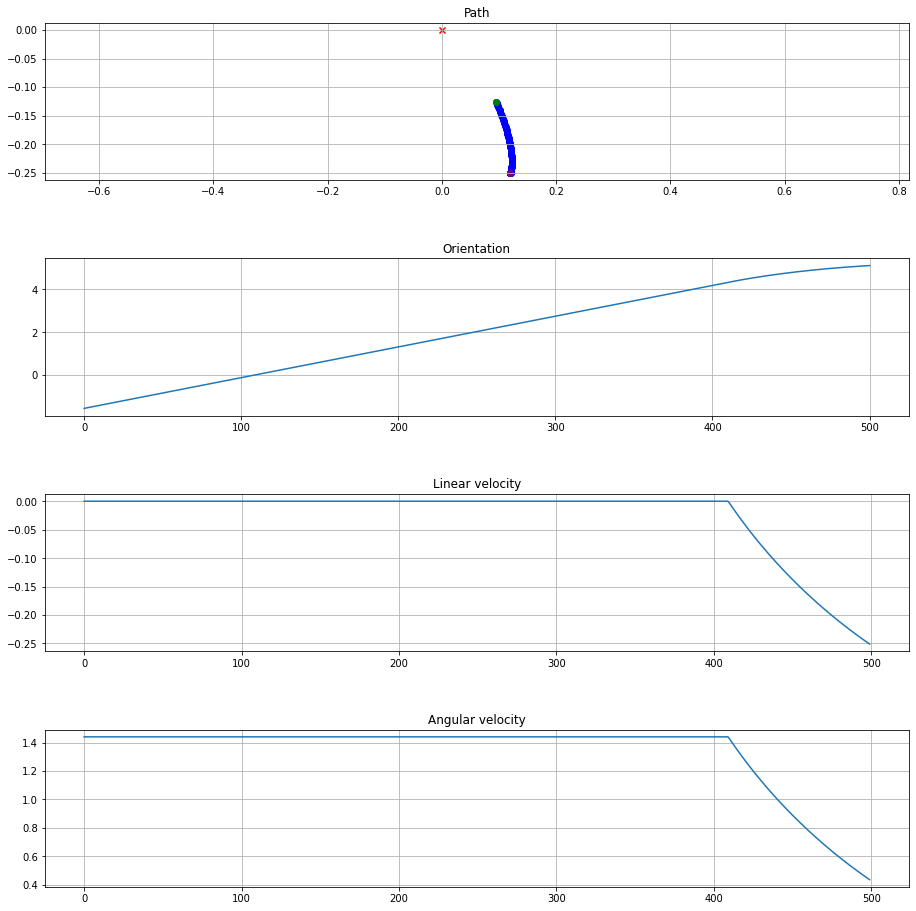

In [3]:
obss_w012, actions_w012 = bi.load_and_run_model(ppo2_model_name_w_012,500,0.5,0.12,list(init_robot_pose.values()))
print("Here a trajectory of {} obss e {} actions from the model {} corresponding to hp: L {} and radius {}".format(len(obss_w012),
                                                    len(actions_w012),ppo2_model_name_w_012, 0.5,0.12))
bi.show_rl_trajectory(obss_w012,actions_w012,0.5,0.12)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Arrived in 393 steps
Here a trajectory of 393 obss e 392 actions from the model ppo2_meters_redesigned_1 corresponding to hp: L 0.5 and radius 0.16
Starting point: x:0.12, y:-0.25 -PURPLE-
End point: x:0.06861717085747968, y:-0.07099439078003433 -GREEN-


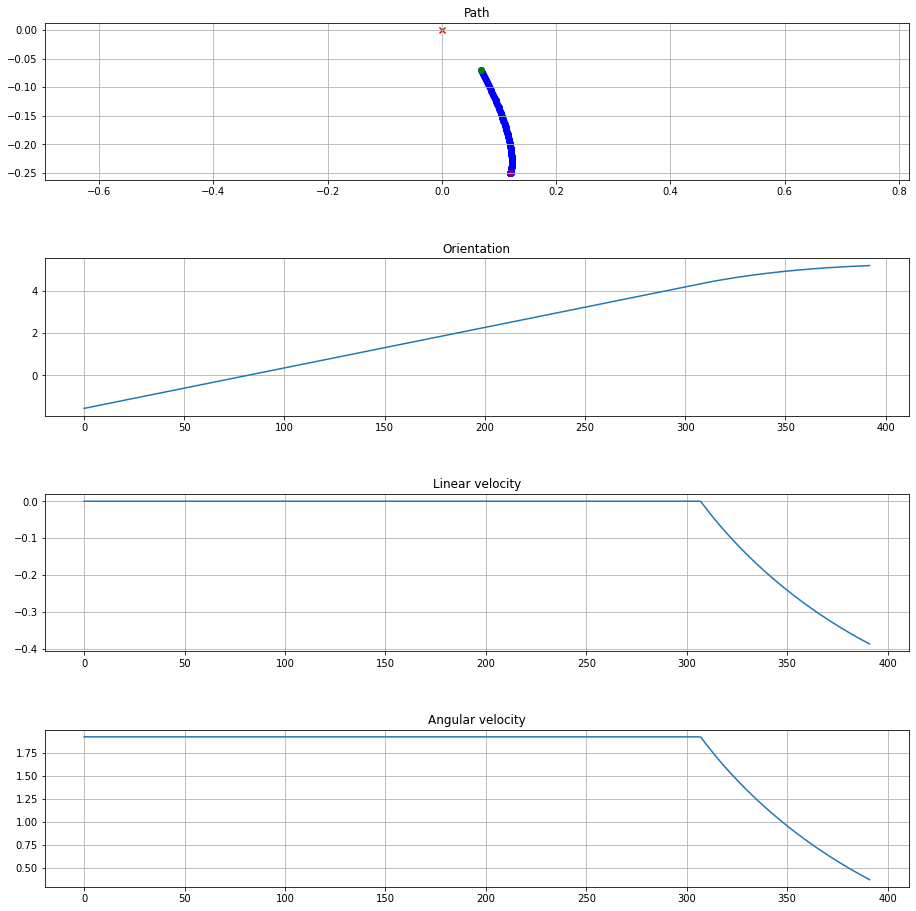

In [4]:
obss_w016, actions_w016 = bi.load_and_run_model(ppo2_model_name_w_016,500,0.5,0.16,list(init_robot_pose.values()))
print("Here a trajectory of {} obss e {} actions from the model {} corresponding to hp: L {} and radius {}".format(len(obss_w016),
                                                    len(actions_w016),ppo2_model_name_w_016, 0.5,0.16))
bi.show_rl_trajectory(obss_w016,actions_w016,0.5,0.16)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Arrived in 370 steps
Here a trajectory of 370 obss e 369 actions from the model ppo2_meters_redesigned_1 corresponding to hp: L 0.5 and radius 0.17
Starting point: x:0.12, y:-0.25 -PURPLE-
End point: x:0.06850526575080616, y:-0.0708776512591738 -GREEN-


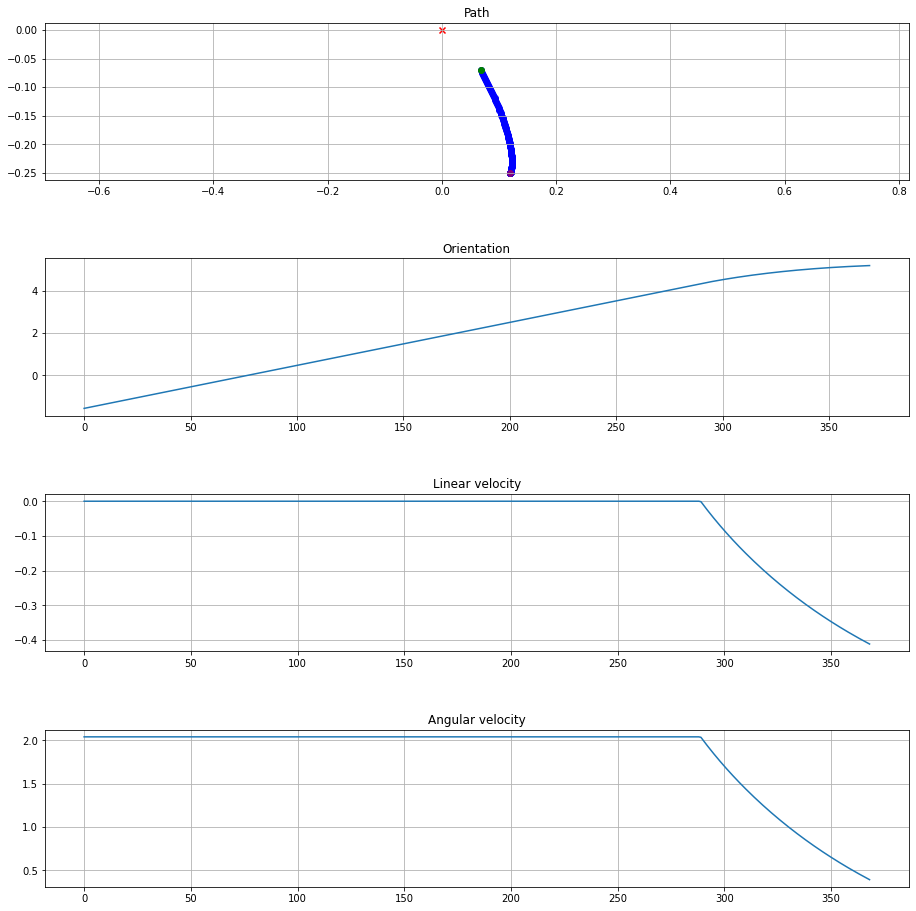

In [5]:
obss_w017, actions_w017 = bi.load_and_run_model(ppo2_model_name_w_017,500,0.5,0.17,list(init_robot_pose.values()))
print("Here a trajectory of {} obss e {} actions from the model {} corresponding to hp: L {} and radius {}".format(len(obss_w017),
                                                    len(actions_w017),ppo2_model_name_w_017, 0.5,0.17))
bi.show_rl_trajectory(obss_w017,actions_w017,0.5,0.17)

In [6]:
#HERE put the right probabilities for the three scenarios
experiment = DifferentialDriveExperiment(axle_lengths_dict={'values':[0.5]}, 
                                         wheel_radii_dict={'values':[0.12,0.16,0.17],'probs':[0.20,0.50,0.30],'true_value':0.15},
                                         tracking_trajectories=[{'L':0.5,'r':0.12,'policy_name':ppo2_model_name_w_012,'env_class_name':env_class_name_w_012},
                                                                {'L':0.5,'r':0.16,'policy_name':ppo2_model_name_w_016,'env_class_name':env_class_name_w_016},
                                                                {'L':0.5,'r':0.17,'policy_name':ppo2_model_name_w_017,'env_class_name':env_class_name_w_017}
                                                               ])
#print("Quanti punti ho: {} ".format(len(experiment.tracking_trajectories[0]['path'])))
experiment.setup_experiment(init_robot_pose)
#HERE the file where the results are saved:
date_prefix = datetime.today().strftime('%Y-%m-%d')
name_prefix = 'online_track_radius_scenario'
output_file_prefix = date_prefix +'_'+name_prefix
graphic_output_file = output_file_prefix+'.gif'
trajectory_info_log_file = output_file_prefix+'.yaml'
print("Those experiment will be saved in {} gif and its trajectory in {}".format(graphic_output_file,trajectory_info_log_file))

ok only wheel prob assigned but the other param has a single value and it will be embedded
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Scenarios [(0.5, 0.12), (0.5, 0.16), (0.5, 0.17)]
dict_values([0.12, -0.25, -1.5707963267948966])
[[ 0.12      ]
 [-0.25      ]
 [-1.57079633]]
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Those experiment will be saved in 2021-06-04_online_track_radius_scenario.gif gif and its trajectory in 2021-06-04_online_track_radius_scenario.yaml


In [7]:
mpc_graphics = do_mpc.graphics.Graphics(experiment.mpc.data)

In [8]:
import matplotlib.pyplot as plt
plt.ion() # interactive mode on
from matplotlib import rcParams
rcParams['text.usetex'] = False
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.0
rcParams['axes.labelsize'] = 'xx-large'
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

# Include these parameters in order to have embedded animations without saving the gif file
rcParams["animation.html"] = "jshtml"
rcParams['animation.embed_limit'] = 2**128

In [9]:
def differential_drive_robot(x, L, r):
    x = x.flatten()
    theta = x[2]
    
    length = 5
    endx = x[0] + length * np.cos(theta)
    endy = x[1] + length * np.sin(theta)
    
    # Get the x,y coordinates of the 2 bars for the given state x
    orientation_x = np.array([
        x[0],
        endx
    ])
    
    orientation_y = np.array([
        x[1],
        endy
    ])
    
    
    left_wheel = np.array([x[0]+L/2*np.cos(theta+np.pi/2),x[1]+L/2*np.sin(theta+np.pi/2)])
    right_wheel = np.array([x[0]+L/2*np.cos(theta-np.pi/2),x[1]+L/2*np.sin(theta-np.pi/2)])

    bar_x = np.array([
        right_wheel[0],
        left_wheel[0]        
    ])
    
    bar_y = np.array([
        right_wheel[1],
        left_wheel[1]     
    ])
    
    left_wheel_front = np.array([left_wheel[0]+r*np.cos(theta),left_wheel[1]+r*np.sin(theta)])
    left_wheel_back = np.array([left_wheel[0]-r*np.cos(theta),left_wheel[1]-r*np.sin(theta)])
    
    left_wheel_x = np.array([
        left_wheel_front[0],
        left_wheel_back[0]        
    ])
    
    left_wheel_y = np.array([
        left_wheel_front[1],
        left_wheel_back[1]     
    ])
    
    right_wheel_front = np.array([right_wheel[0]+r*np.cos(theta),right_wheel[1]+r*np.sin(theta)])
    right_wheel_back = np.array([right_wheel[0]-r*np.cos(theta),right_wheel[1]-r*np.sin(theta)])
    
    right_wheel_x = np.array([
        right_wheel_front[0],
        right_wheel_back[0]        
    ])
    
    right_wheel_y = np.array([
        right_wheel_front[1],
        right_wheel_back[1]     
    ])
    
    orientation = np.stack((orientation_x, orientation_y))
    bar = np.stack((bar_x, bar_y))
    left_wheel = np.stack((left_wheel_x,left_wheel_y))
    right_wheel = np.stack((right_wheel_x,right_wheel_y))
        
    return orientation, bar, left_wheel, right_wheel

In [10]:
#help(do_mpc.controller.MPC.set_uncertainty_weights)

In [11]:
%%capture

fig = plt.figure(figsize=(16,9))

ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan=5)
ax2 = plt.subplot2grid((5, 2), (0, 1))
ax3 = plt.subplot2grid((5, 2), (1, 1))
ax4 = plt.subplot2grid((5, 2), (2, 1))
ax5 = plt.subplot2grid((5, 2), (3, 1))
ax6 = plt.subplot2grid((5, 2), (4, 1))

ax2.set_ylabel('$\omega_{left}$ [rad/s]')
ax3.set_ylabel('$\omega_{right}$ [rad/s]')
ax4.set_ylabel('$v$ [m/s]')
ax5.set_ylabel('$\omega$ [rad/s]')
ax6.set_ylabel('$distance$ [m]')

# Axis on the right.
for ax in [ax2, ax3, ax4, ax5, ax6]:
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    if ax != ax6:
        ax.xaxis.set_ticklabels([])

ax6.set_xlabel('time [s]')

mpc_graphics.add_line(var_type='_u', var_name='u_l', axis=ax2)
mpc_graphics.add_line(var_type='_u', var_name='u_r', axis=ax3)
mpc_graphics.add_line(var_type='_aux', var_name='v', axis=ax4)
mpc_graphics.add_line(var_type='_aux', var_name='w', axis=ax5)
#mpc_graphics.add_line(var_type='_aux', var_name='position_norm', axis=ax6)
mpc_graphics.add_line(var_type='_aux', var_name='trajectory_error', axis=ax6)
#mpc_graphics.add_line(var_type='_aux', var_name='squared_distance', axis=ax6)

ax1.axhline(0,color='black')

orientation_line = ax1.plot([],[], '-o', color = 'black',dashes = [6,2])
bar_line = ax1.plot([],[], color = 'blue')
left_wheel_line = ax1.plot([],[],'blue')
right_wheel_line = ax1.plot([],[],'blue')

ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)
#ax1.set_axis_off()

ax1.set_aspect('equal')

fig.align_ylabels()
fig.tight_layout()

In [12]:
u0 = experiment.mpc.make_step(experiment.simulator.x0)

MPC tvp_fun function has 2 parameters in the signature
x0 is [0.12, -0.25, -1.5708] and its type is <class 'casadi.casadi.DM'>
Make step tvp0['_tvp'] type [[DM([0.12, -0.25, -1.5708, -3, 3]), DM([0.12, -0.25, -1.5564, -3, 3]), DM([0.12, -0.25, -1.542, -3, 3]), DM([0.12, -0.25, -1.5276, -3, 3]), DM([0.12, -0.25, -1.5132, -3, 3]), DM([0.12, -0.25, -1.4988, -3, 3]), DM([0.12, -0.25, -1.4844, -3, 3]), DM([0.12, -0.25, -1.47, -3, 3]), DM([0.12, -0.25, -1.4556, -3, 3]), DM([0.12, -0.25, -1.4412, -3, 3]), DM([0.12, -0.25, -1.4268, -3, 3]), DM([0.12, -0.25, -1.4124, -3, 3]), DM([0.12, -0.25, -1.398, -3, 3]), DM([0.12, -0.25, -1.3836, -3, 3]), DM([0.12, -0.25, -1.3692, -3, 3]), DM([0.12, -0.25, -1.3548, -3, 3]), DM([0.12, -0.25, -1.3404, -3, 3]), DM([0.12, -0.25, -1.326, -3, 3]), DM([0.12, -0.25, -1.3116, -3, 3]), DM([0.12, -0.25, -1.2972, -3, 3]), DM([0.12, -0.25, -1.2828, -3, 3]), DM([0.12, -0.25, -1.2684, -3, 3]), DM([0.12, -0.25, -1.254, -3, 3]), DM([0.12, -0.25, -1.2396, -3, 3]), DM([0.12,

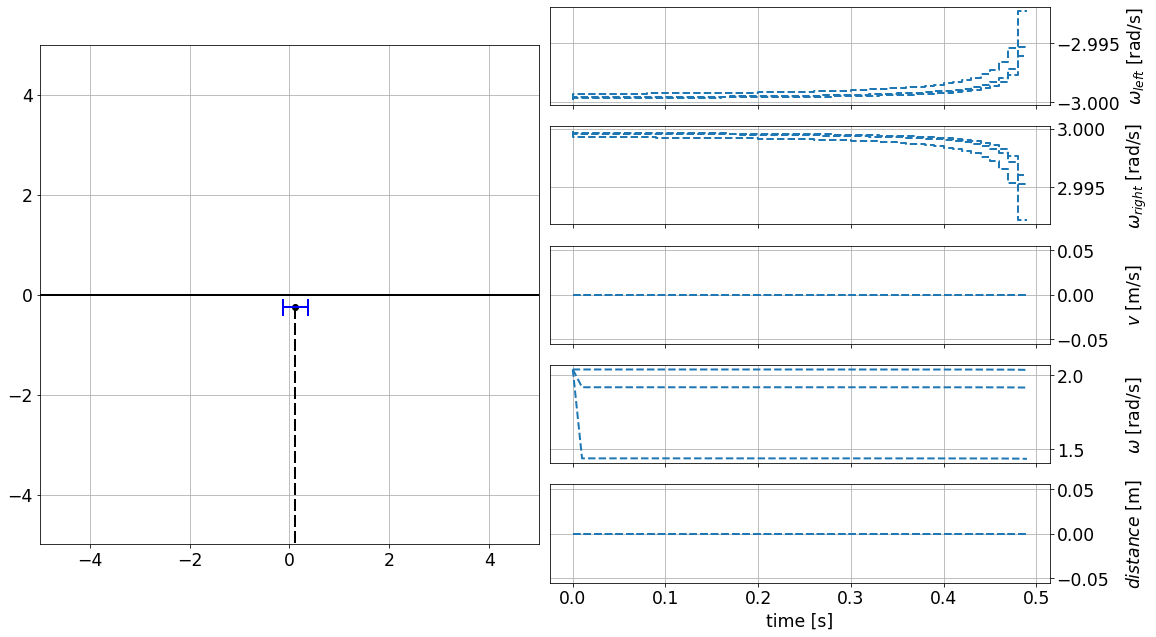

In [13]:
x0_np = experiment.simulator.x0.cat.full()
orientation, bar, left_wheel, right_wheel = differential_drive_robot(x0_np, experiment.true_axle_length, experiment.true_wheel_radius)
orientation_line[0].set_data(orientation[0], orientation[1])
bar_line[0].set_data(bar[0], bar[1])
right_wheel_line[0].set_data(right_wheel[0], right_wheel[1])
left_wheel_line[0].set_data(left_wheel[0], left_wheel[1])

mpc_graphics.plot_predictions()
mpc_graphics.reset_axes()

fig

In [14]:
%%capture
# Quickly reset the history of the MPC data object.
experiment.mpc.reset_history()

n_steps = 420
#n_steps = 10
x0 = experiment.simulator.x0
for k in range(n_steps):
    u0 = experiment.mpc.make_step(x0)
    y_next = experiment.simulator.make_step(u0)
    x0 = experiment.estimator.make_step(y_next)

In [15]:
x_arr = experiment.mpc.data['_x']
u_arr = experiment.mpc.data['_u']
last_state = x0
trajectory_info = {'x':x_arr.tolist(),'u':u_arr.tolist(),'final_x':last_state.flatten().tolist()}
print("State array is a list of {} states. Here is the content: \n {}".format(len(trajectory_info['x']),trajectory_info['x']))
print("Commands applied in those state are a list of {} commands. Here is the content: \n {}".format(len(trajectory_info['u']),trajectory_info['u']))
print("Last state is {}".format(trajectory_info['final_x']))
#HERE states and commands are saved in the yaml log file
with open(trajectory_info_log_file, 'w') as file:
    documents = yaml.dump(trajectory_info, file)

State array is a list of 420 states. Here is the content: 
 [[0.12, -0.25, -1.5707963267948966], [0.12, -0.25, -1.5527972830352705], [0.12, -0.25, -1.534798239278276], [0.12, -0.25, -1.5167991955212814], [0.12, -0.25, -1.4988001517642868], [0.12, -0.25, -1.4808011080072923], [0.12, -0.25, -1.4628020642502977], [0.12, -0.25, -1.4448030204933031], [0.12, -0.25, -1.4268039767363085], [0.12, -0.25, -1.408804932979314], [0.12, -0.25, -1.3908058892223194], [0.12, -0.25, -1.3728068454653248], [0.12, -0.25, -1.3548078017083303], [0.12, -0.25, -1.3368087579513357], [0.12, -0.25, -1.3188097141943411], [0.12, -0.25, -1.3008106704373466], [0.12, -0.25, -1.282811626680352], [0.12, -0.25, -1.2648125829233574], [0.12, -0.25, -1.2468135391663628], [0.12, -0.25, -1.2288144954093683], [0.12, -0.25, -1.2108154516523737], [0.12, -0.25, -1.1928164078953791], [0.12, -0.25, -1.1748173641383846], [0.12, -0.25, -1.15681832038139], [0.12, -0.25, -1.1388192766243954], [0.12, -0.25, -1.1208202328674008], [0.12, -

In [16]:
#HERE how to reload the log of the states and command
with open(trajectory_info_log_file,'r') as f:
    saved_log_dict = yaml.load(f, Loader=yaml.FullLoader)
    print(saved_log_dict)
    print("u length is {} and x length is {}".format(len(saved_log_dict['u']),len(saved_log_dict['x'])))

{'final_x': [0.06559346962156379, -0.06527861730738206, 5.203773484364158], 'u': [[-2.9998406266043376, 2.9998406266043376], [-2.9998406261657493, 2.9998406261657493], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.999840626165749, 2.999840626165749], [-2.9998406261657484, 2.9998406261657484], [-2.9998406261657484, 2.9998406261657484], [-2.9998406261657484, 2.9998406261657484], [-2.9998406261657484, 2.9998406261657484], [-2.999840626165748, 2.999840626165748], [-2.999840626165748, 2.999840626165748], [-2.999840626165748, 2.999840626165748], [-2.999840626165748, 2.999840626165748], [-2.999840626165748, 2.999840626165748], [-2.

/root/miniconda3/envs/dompc_dev/lib/python3.6/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
Arrived in 2 steps
u length is 420 and x length is 420


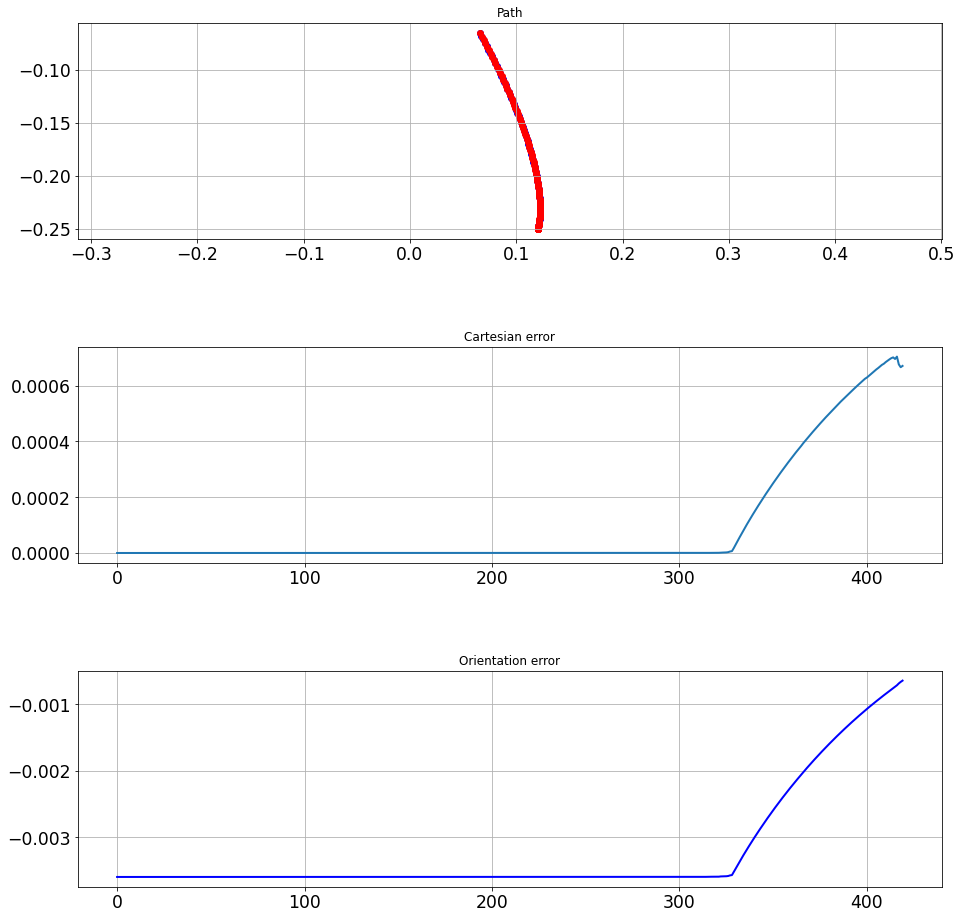

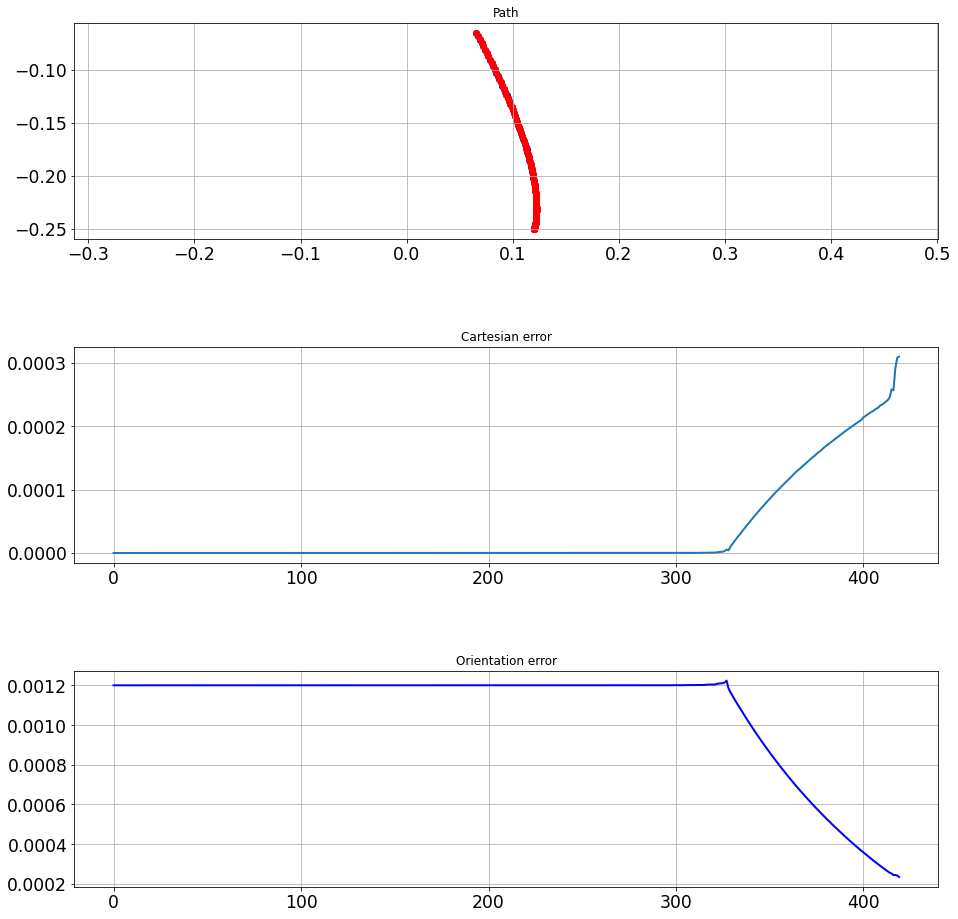

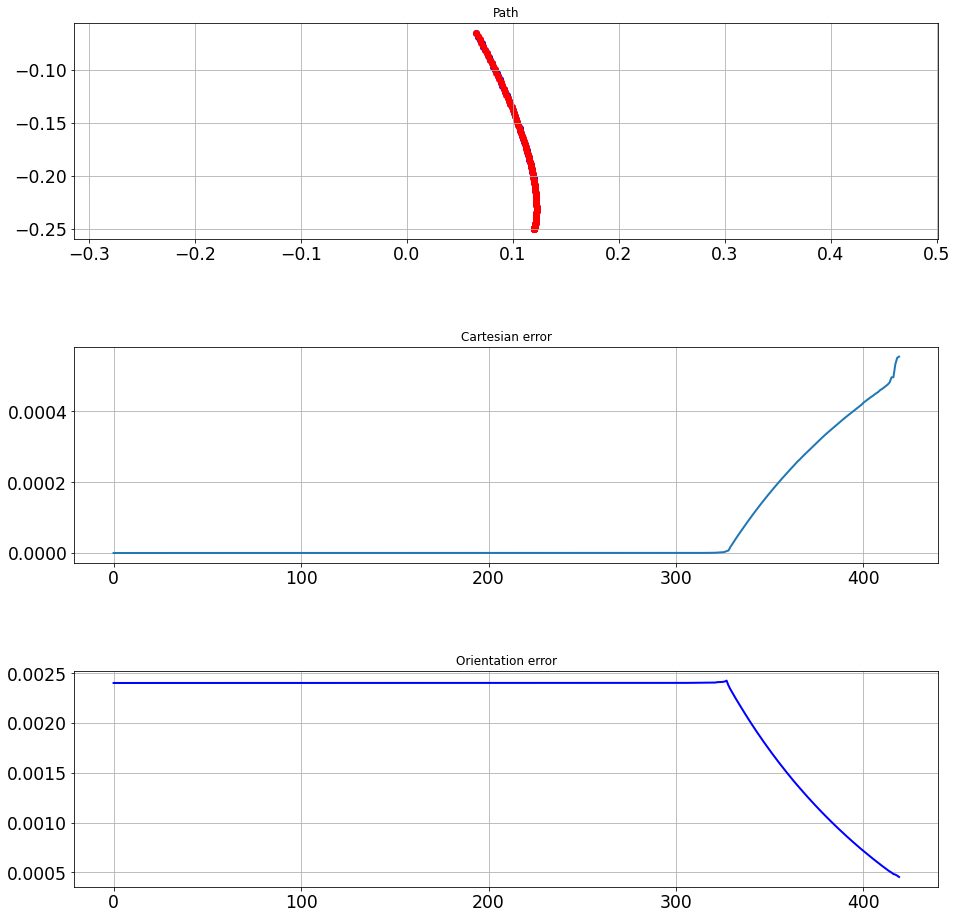

In [17]:
#HERE compare each trained model with the trajectory of the controller
policy_env_dict_w_012 = bi.setup_model_execution_on_env(ppo2_model_name_w_012,0.50,0.12,init_pos=None,env_class=env_class_name_w_012)
policy_env_dict_w_016 = bi.setup_model_execution_on_env(ppo2_model_name_w_016,0.50,0.16,init_pos=None,env_class=env_class_name_w_016)
policy_env_dict_w_017 = bi.setup_model_execution_on_env(ppo2_model_name_w_017,0.50,0.17,init_pos=None,env_class=env_class_name_w_017)
comparison_012 = bi.compare_trajectory_with_predicted_trajectory(saved_log_dict['x'],saved_log_dict['u'],saved_log_dict['final_x'],
                                                                 policy_env_dict_w_012['policy'],policy_env_dict_w_012['env'])
comparison_016 = bi.compare_trajectory_with_predicted_trajectory(saved_log_dict['x'],saved_log_dict['u'],saved_log_dict['final_x'],
                                                                 policy_env_dict_w_016['policy'],policy_env_dict_w_016['env'])
comparison_017 = bi.compare_trajectory_with_predicted_trajectory(saved_log_dict['x'],saved_log_dict['u'],saved_log_dict['final_x'],
                                                                 policy_env_dict_w_017['policy'],policy_env_dict_w_017['env'])
print("u length is {} and x length is {}".format(len(saved_log_dict['u']),len(saved_log_dict['x'])))
bi.show_policy_comparison_vs_gt(comparison_012)
bi.show_policy_comparison_vs_gt(comparison_016)
bi.show_policy_comparison_vs_gt(comparison_017)

In [ ]:
from matplotlib.animation import FuncAnimation, FFMpegWriter, ImageMagickWriter

# The function describing the gif:
def update(t_ind):
    orientation, bar, left_wheel, right_wheel = differential_drive_robot(x_arr[t_ind],experiment.true_axle_length,experiment.true_wheel_radius)
    orientation_line[0].set_data(orientation[0],orientation[1])
    bar_line[0].set_data(bar[0],bar[1])
    right_wheel_line[0].set_data(right_wheel[0],right_wheel[1])
    left_wheel_line[0].set_data(left_wheel[0],left_wheel[1])
    mpc_graphics.plot_results(t_ind)
    mpc_graphics.plot_predictions(t_ind)
    mpc_graphics.reset_axes()


anim = FuncAnimation(fig, update, frames=n_steps, repeat=False)

In [ ]:
%%capture

fig2 = plt.figure(figsize=(16,9))
ax = fig2.add_subplot()
ax.set_aspect('equal')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title('Followed trajectory',fontsize = 16)

ax.plot(x_arr[:,[0]],x_arr[:,[1]])

In [ ]:
fig2

In [ ]:
# Show the animation as embedded without saving it as a gif
anim

In [ ]:
# Save the animation as a gif
gif_writer = ImageMagickWriter(fps=10)
anim.save(graphic_output_file, writer=gif_writer)

In [ ]:
!identify -list resource

In [ ]:
print(x_arr[n_steps-1])

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

In [ ]:
from pathlib import Path
gifPath = Path(graphic_output_file)
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

In [ ]:
#if there are issues in making the gif due to memory limits in ImageMagick then do the following steps:
# -- if not present, install a text editor like nano
#1- open terminal : sudo nano /etc/ImageMagick-6/policy.xml
#2- Enter your password
#3- You should be in nano file, change the line with "ressource memory" to
#4- <policy domain="resource" name="memory" value="5000MiB"/>
#5- Save the nano file : ctrl + o and enter to confirm
#6- Up the memory if necessary